#  Introduction
For our project we set out with the goal of discovering the neighborhood in Pittsburgh where you are most likely to slip. At first our group considered finding which neighborhood was most dog friendly or greenest, however we landed on slipping risk as we thought it would be easier to measure and more important.

In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# The Metric
Our metric is based on which neighborhood has the most slipping risks. The features that we are using to measure this are staircases due to risk of falling, water features due to risk of slipping on wet surfaces, and grocery stores due to risk of banana peels being left in the vicinity.


**Stairs**

Stairs by Neighborhood:

South Side Slopes         109
Mount Washington          54
Perry North               48
Beechview                 42
Greenfield                40
Carrick                   39
Brookline                 38
Elliott                   36
Perry South               35
Sheraden                  35
Beltzhoover               32
Marshall-Shadeland        32
Highland Park             28
Squirrel Hill South       28
Duquesne Heights          24
Allentown                 23
Upper Hill                21
Hazelwood                 21
Spring Hill-City View     20
Polish Hill               20
Overbrook                 19
Fineview                  18
Troy Hill                 18
Lower Lawrenceville       17
Arlington                 15
Garfield                  15
Westwood                  14
Brighton Heights          13
Stanton Heights           13
Spring Garden             13
Upper Lawrenceville       12
Lincoln-Lemington-Belmar  12
Middle Hill               11
South Oakland    

Text(0, 0.5, 'Neighborhood')

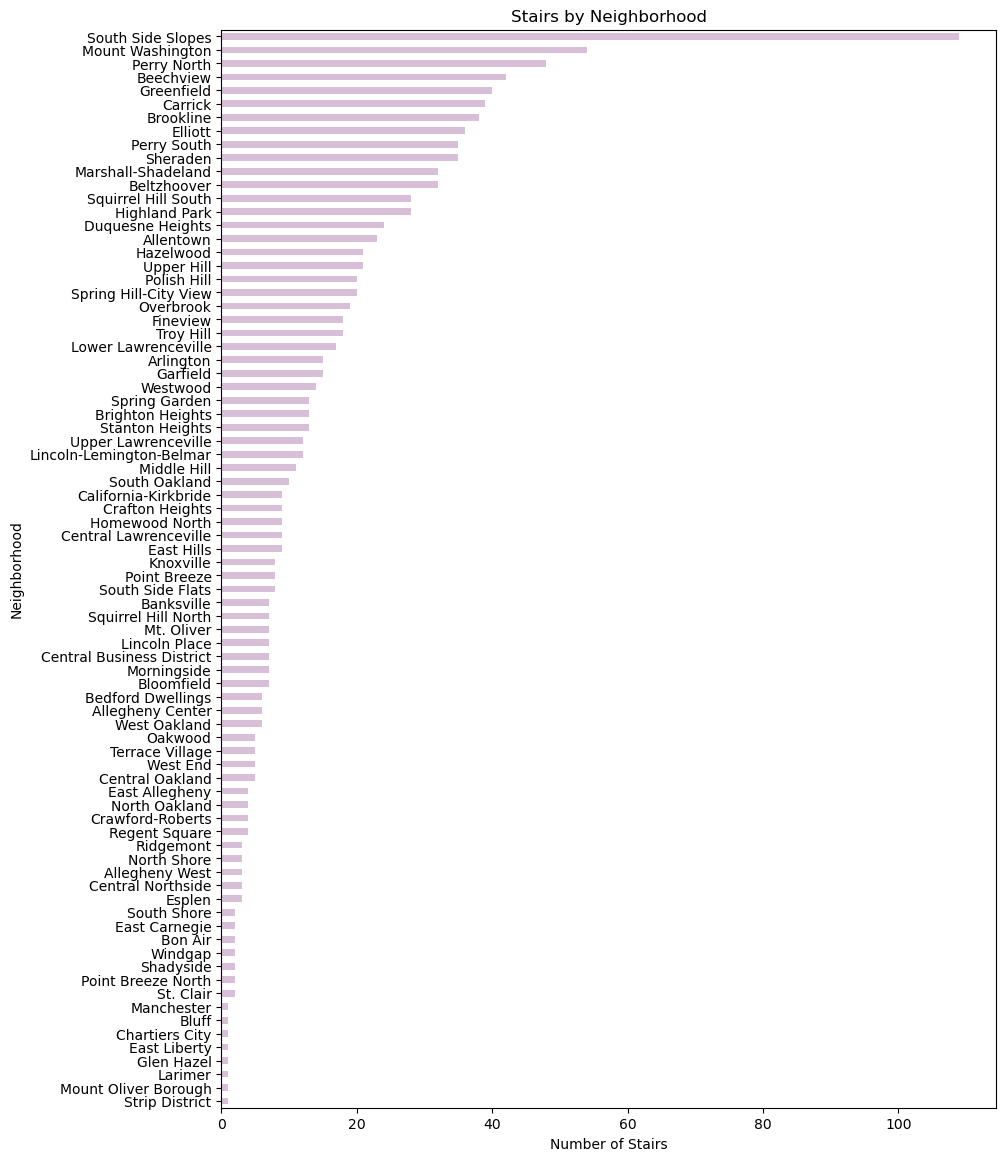

In [7]:
#import
df = pd.read_csv("stairs.csv")

#counts stairs
stair_counts = df['neighborhood'].value_counts().sort_values(ascending=False)
total_stairs = stair_counts.sum()

#print results
print("Stairs by Neighborhood:\n")
for neighborhood, count in stair_counts.items():
    print(f"{neighborhood:<25} {count}")
print("Total stairs \t\t", total_stairs)

#bar chart (vertical for easy reading)
stair_counts.sort_values().plot(kind='barh', color='thistle', figsize=(10, 14))
plt.title('Stairs by Neighborhood')
plt.xlabel('Number of Stairs')
plt.ylabel('Neighborhood')

**Water features**

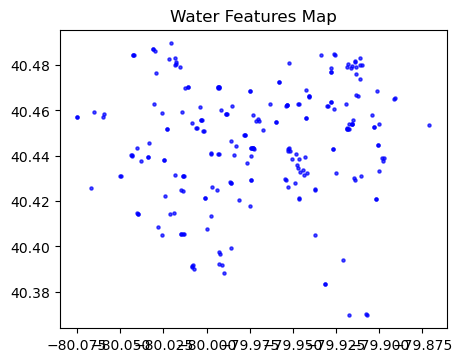

In [50]:
slope = pd.read_csv("Water_Features.csv")
waterPoints = gpd.GeoDataFrame(slope, geometry=gpd.points_from_xy(slope['longitude'], slope['latitude']), crs="EPSG:4326")
#plot points
waterPoints.plot(figsize=(5, 5), color='blue', markersize=5, alpha=0.7)
plt.title("Water Features Map")
plt.show()

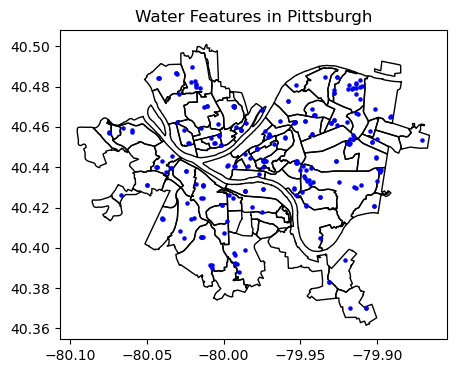

In [51]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
waterPointsLinedUp = waterPoints.to_crs(neighborhoods.crs)#this lines up the points with neighborhoods
ax = neighborhoods.plot(figsize=(5, 5), edgecolor='black', facecolor='none')

#this puts the data on top of the neighboorhods
waterPointsLinedUp.plot(ax=ax, color='blue', markersize=5)

plt.title("Water Features in Pittsburgh")
plt.show()

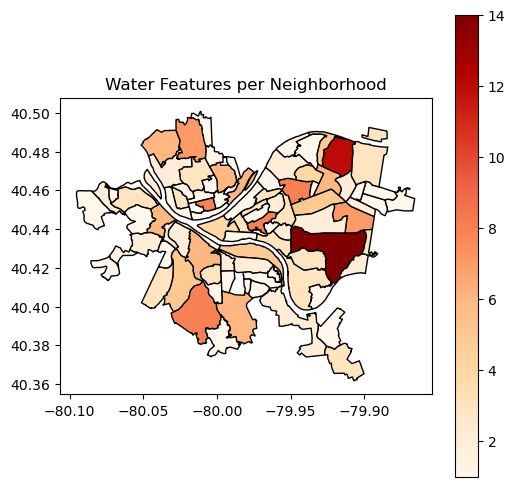

In [55]:
#puts the data points joined into neighboorhoods and counts them
joined = gpd.sjoin(neighborhoods, waterPoints, how="left", predicate='contains')
neighborhoodCounts = joined.groupby(joined.index).size()
#add count of water feature data to each neighborhoods data
neighborhoods['water_count'] = neighborhoodCounts
neighborhoods['water_count'] = neighborhoods['water_count'].fillna(0)

ax = neighborhoods.plot(column='water_count', cmap='OrRd', legend=True, edgecolor='black', figsize=(6, 6))
ax.set_title("Water Features per Neighborhood")
plt.show()

In [56]:
#Sorts water_count and prints it
top_neighborhood = neighborhoods.sort_values(by='water_count', ascending=False).head(5)
print(top_neighborhood[['hood', 'water_count']])

                   hood  water_count
24  Squirrel Hill South           14
36        Highland Park           12
65      Terrace Village            8
58     Allegheny Center            8
31           Bloomfield            8


**Banana Peels**

In [53]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("farmers markets.csv")
df = pd.DataFrame(data)
print(df.head())
def city_filter(group):
    return group.name == "Pittsburgh"
    
markit = df.groupby('city').filter(city_filter)

    _id  fid                                          name          x  \
0  4159    1              5 Generation Bakers—Green Grocer -80.068177   
1  4160    2  A Child’s World Day Care Center—Green Grocer -79.881320   
2  4161    3       Alma Illery Medical Center—Green Grocer -79.896214   
3  4162    4                         Aspinwall Flea Market -79.904517   
4  4163    5              Bachman’s Greenhouse and Nursery -79.711238   

           y               location                address             city  \
0  40.465622                         1100 Chartiers Avenue     McKees Rocks   
1  40.412364                              300 Rankin Blvd.           Rankin   
2  40.454592                          7227 Hamilton Avenue       Pittsburgh   
3  40.489755  Municipal parking lot      250 Freeport Road       Pittsburgh   
4  40.639294                            2903 Freeport Road  Natrona Heights   

  state    zip                  day_time         season  
0    PA  15136  Tuesday 12:0

Did a bunch of extremely tedious filtering stuff here because my files didn't work :P

In [34]:
# Fixing neighborhood names first
markit.at[2, 'neighborhoods'] = 'Homewood'
markit.at[3, 'neighborhoods'] = 'Aspinwall'
markit.at[7, 'neighborhoods'] = 'Beechview'
markit.at[9, 'neighborhoods'] = 'Bloomfield'
markit.at[12, 'neighborhoods'] = 'Carrick'
markit.at[17, 'neighborhoods'] = 'East Liberty'
markit.at[20, 'neighborhoods'] = 'Etna' 
markit.at[22, 'neighborhoods'] = 'East Liberty'
markit.at[23, 'neighborhoods'] = 'Central Oakland'
markit.at[24, 'neighborhoods'] = 'Forest Hills'
markit.at[25, 'neighborhoods'] = 'Fox Chapel'
markit.at[26, 'neighborhoods'] = 'Millvale'
markit.at[28, 'neighborhoods'] = 'Green Tree' 
markit.at[31, 'neighborhoods'] = 'East Liberty'
markit.at[33, 'neighborhoods'] = 'Lawrenceville'
markit.at[34, 'neighborhoods'] = 'Plum' 
markit.at[35, 'neighborhoods'] = 'Downtown'
markit.at[36, 'neighborhoods'] = 'Ross' 
markit.at[37, 'neighborhoods'] = 'Downtown'
markit.at[41, 'neighborhoods'] = 'Mt. Lebanon'
markit.at[42, 'neighborhoods'] = 'Mt. Lebanon'
markit.at[43, 'neighborhoods'] = 'North Side'
markit.at[44, 'neighborhoods'] = 'Central Oakland'
markit.at[47, 'neighborhoods'] = 'Penn Hills' 
markit.at[48, 'neighborhoods'] = 'South Side Slopes'
markit.at[49, 'neighborhoods'] = 'Pleasant Hills'
markit.at[51, 'neighborhoods'] = 'Ross'

markit = markit.reset_index()

# Now count markets per neighborhood
market_counts = markit['neighborhoods'].value_counts().reset_index()
market_counts.columns = ['neighborhood', 'market_count']

# Read the shapefile
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")

# Print results
print(market_counts)


         neighborhood  market_count
0        East Liberty             3
1            Downtown             2
2                Ross             2
3     Central Oakland             2
4         Mt. Lebanon             2
5             Carrick             1
6          Bloomfield             1
7           Beechview             1
8           Aspinwall             1
9            Homewood             1
10         Fox Chapel             1
11               Etna             1
12       Forest Hills             1
13      Lawrenceville             1
14         Green Tree             1
15           Millvale             1
16               Plum             1
17         North Side             1
18         Penn Hills             1
19  South Side Slopes             1
20     Pleasant Hills             1


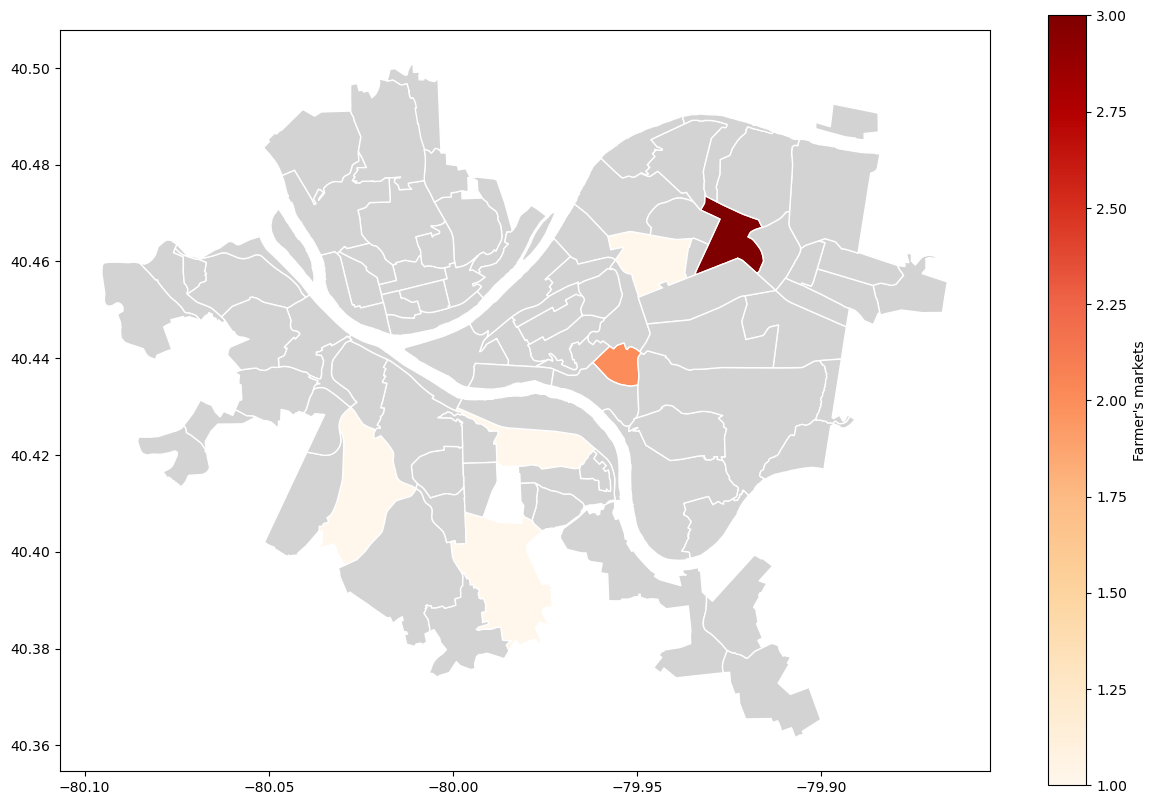

In [76]:
markit = markit.drop([6, 9, 12, 15, 11, 17, 19, 20, 25, 26], errors='ignore')
market_map = neighborhoods.merge(market_counts, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
market_map[['hood','market_count','geometry']]
market_map.plot(column='market_count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Farmer's markets"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
plt.show()

## Calculation + total map
We made it so that one staircase was the base unit. Therefore one water feature has the weight 6 staircases, and one farmer's market has the weight of 50 staircases.

In [77]:
# Merge market_counts into neighborhoods
neighborhoods = neighborhoods.merge(market_counts, how='left', left_on='hood', right_on='neighborhood')
neighborhoods['market_count'] = neighborhoods['market_count'].fillna(0)

#answer calculation
neighborhoods["totalPoints"] = neighborhoods["hood_no"] + neighborhoods["water_count"] * 6 + neighborhoods["market_count"] *50
print(neighborhoods[['hood', 'hood_no', 'water_count', 'market_count', 'totalPoints']].sort_values('totalPoints', ascending=False).head())

                   hood  hood_no  water_count  market_count  totalPoints
77         East Liberty       29            6           3.0        215.0
24  Squirrel Hill South       77           14           0.0        161.0
15    South Side Slopes       73            2           1.0        135.0
0       Central Oakland       20            2           2.0        132.0
65      Terrace Village       83            8           0.0        131.0


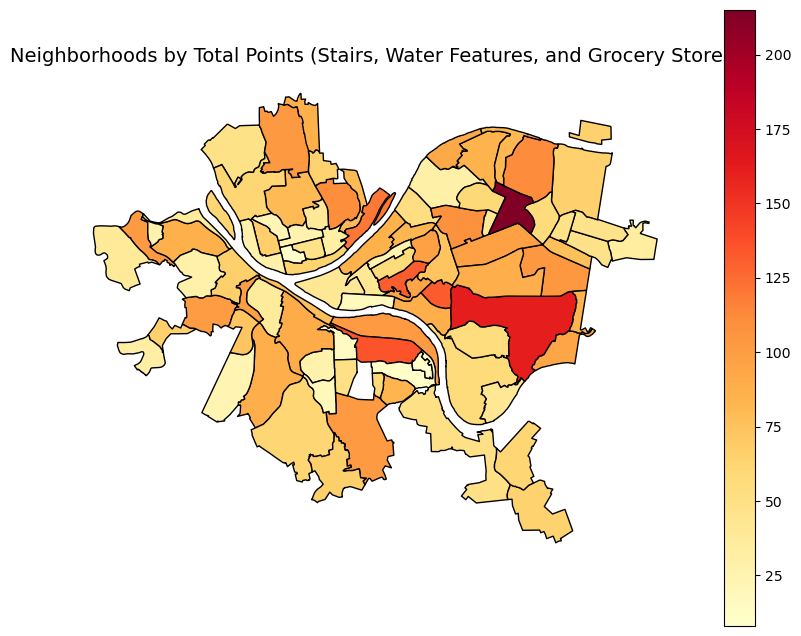

In [78]:
map = neighborhoods.plot(column='totalPoints',cmap='YlOrRd', legend=True,edgecolor='black',figsize=(10, 8))
map.set_title("Neighborhoods by Total Points (Stairs, Water Features, and Grocery Stores)", fontsize=14)
map.set_axis_off()
plt.show()

## The Best Neighborhood
In the end we found that you are most likely to slip and fall in East Liberty, though South Side Slopes wins for number of stairs and Squirrel Hill South has the most water features. The weight of 50 for farmers markets means that there are the equivalent of 150 stairs in East Liberty; at the end of the day, banana peels are the most hazardous slipping risk in our lives, and innocent people slip on them every day. East Liberty wins for the neighborhood where you are most likely to slip. 



# Conclusion
## Henry Unkefer
After finding out that our data shows East Liberty is the most dangerous to slip, it shook me to my core. I was thinking that Oakland would be the final result  of the data due to the abundance of activity, however I was incorrect.
## Erika Roa
Our data analysis showed that East Liberty is the best based on the weight we used. My personal favorite neighborhood is South Side Slopes because it sounds like it would be the best place to slip and fall. If I fell in a place with “slope” in the name, I really can’t be mad.
## Miles Fraser
I like East Liberty, I went to the Target there after school constantly. I of course slipped on banana peels all the time; it didn’t surprise me at all to see this as the final result. 
